In [2]:
import pandas as pd

### Data from trying to solve the 'Cartpole-v0' Environment

In [ ]:
df_v = pd.read_csv('data\HC_vanilla.csv', index_col=0).rename(columns={'0':'HC_v_D'})
df_A = pd.read_csv('data\HC_A.csv', index_col=0).rename(columns={'0':'HC_A_D'})
df_AN = pd.read_csv('data\HC_AN.csv', index_col=0).rename(columns={'0':'HC_AN_D'})
df_v_S = pd.read_csv('data\HC_vanilla_S.csv', index_col=0).rename(columns={'0':'HC_v_S'})
df_A_S = pd.read_csv('data\HC_A_S.csv', index_col=0).rename(columns={'0':'HC_A_S'})
df_AN_S = pd.read_csv('data\HC_AN_S.csv', index_col=0).rename(columns={'0':'HC_AN_S'})

df_SHC_v = pd.read_csv('data\SHC_vanilla.csv', index_col=0).rename(columns={'0':'SHC_v_D'})
df_SHC_A = pd.read_csv('data\SHC_A.csv', index_col=0).rename(columns={'0':'SHC_A_D'})
df_SHC_AN = pd.read_csv('data\SHC_AN.csv', index_col=0).rename(columns={'0':'SHC_AN_D'})
df_SHC_v_S = pd.read_csv('data\SHC_vanilla_S.csv', index_col=0).rename(columns={'0':'SHC_v_S'})
df_SHC_A_S = pd.read_csv('data\SHC_A_S.csv', index_col=0).rename(columns={'0':'SHC_A_S'})
df_SHC_AN_S = pd.read_csv('data\SHC_AN_S.csv', index_col=0).rename(columns={'0':'SHC_AN_S'})

##### Regular Hill - Climbing

In [10]:
df = pd.concat([df_v, df_A, df_AN, df_v_S, df_A_S, df_AN_S], axis=1)
df

,HC_v_D,HC_A_D,HC_AN_D,HC_v_S,HC_A_S,HC_AN_S
0,10000,1742,244,10000,10000,809
1,4277,102,102,10000,10000,693
2,10000,10000,414,10000,10000,797
3,10000,10000,975,10000,10000,918
4,8100,103,103,10000,10000,1212
...,...,...,...,...,...,...
995,1296,102,102,10000,10000,737
996,2762,679,439,10000,10000,750
997,10000,10000,312,10000,10000,2024
998,10000,121,121,10000,10000,2053


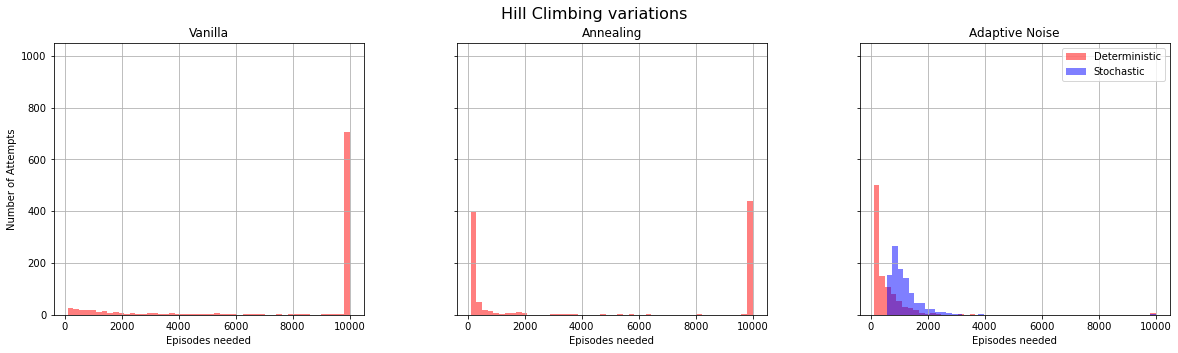

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))
fig.suptitle('Hill Climbing variations', fontsize=16)
n = 3
for j in range(n):
    df.hist(column=df.columns[j], bins=50, ax=ax[j], alpha=0.5, color='red')
    df.hist(column=df.columns[j+n], bins=50, ax=ax[j], alpha=0.5, color='blue')
    ax[j].set_title(['Vanilla', 'Annealing', 'Adaptive Noise'][j])
    ax[j].set(xlabel='Episodes needed')
    
ax[0].set(ylabel='Number of Attempts')
_ = plt.legend(['Deterministic', 'Stochastic'])


In [44]:
df.describe()

,HC_v_D,HC_A_D,HC_AN_D,HC_v_S,HC_A_S,HC_AN_S
count,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000
mean,7922.480000,4770.575000,543.707000,10000.0,10000.0,1189.653000
std,3541.593321,4765.821621,892.785649,0.0,0.0,634.610778
min,112.000000,100.000000,100.000000,10000.0,10000.0,566.000000
25%,6367.000000,136.000000,131.000000,10000.0,10000.0,827.000000
50%,10000.000000,1523.000000,295.000000,10000.0,10000.0,1035.500000
75%,10000.000000,10000.000000,669.250000,10000.0,10000.0,1343.750000
max,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.000000


##### With Steepest - Hill 

In [11]:
df_SHC = pd.concat([df_SHC_v, df_SHC_A, df_SHC_AN, df_SHC_v_S, df_SHC_A_S, df_SHC_AN_S], axis=1)
df_SHC

,SHC_v_D,SHC_A_D,SHC_AN_D,SHC_v_S,SHC_A_S,SHC_AN_S
0,295,342,349,1000,1000,820
1,235,140,130,1000,1000,877
2,327,244,245,1000,1000,782
3,611,1000,137,1000,1000,807
4,1000,402,672,1000,1000,731
...,...,...,...,...,...,...
995,430,118,180,1000,1000,854
996,755,1000,148,1000,1000,741
997,431,202,218,1000,1000,886
998,319,304,303,1000,1000,840


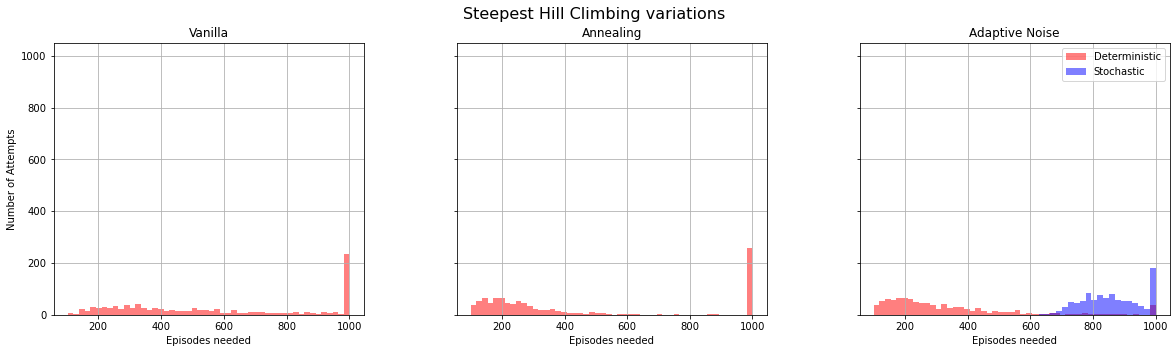

In [52]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))
fig.suptitle('Steepest Hill Climbing variations', fontsize=16)
n = 3
for j in range(n):
    df_SHC.hist(column=df_SHC.columns[j], bins=50, ax=ax[j], alpha=0.5, color='red')
    df_SHC.hist(column=df_SHC.columns[j+n], bins=20, ax=ax[j], alpha=0.5, color='blue')
    ax[j].set_title(['Vanilla', 'Annealing', 'Adaptive Noise'][j])
    ax[j].set(xlabel='Episodes needed')
    
ax[0].set(ylabel='Number of Attempts')
_ = plt.legend(['Deterministic', 'Stochastic'])


In [43]:
df_SHC.describe()

,SHC_v_D,SHC_A_D,SHC_AN_D,SHC_v_S,SHC_A_S,SHC_AN_S
count,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000
mean,569.436000,448.324000,334.994000,1000.0,1000.0,862.143000
std,305.339896,345.586109,217.822135,0.0,0.0,93.038017
min,103.000000,100.000000,100.000000,1000.0,1000.0,627.000000
25%,298.750000,185.750000,185.000000,1000.0,1000.0,788.750000
50%,504.500000,274.000000,263.000000,1000.0,1000.0,857.000000
75%,930.750000,1000.000000,404.500000,1000.0,1000.0,940.000000
max,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000
